# ENGR 421 - Homework 1
## Harun Şaşmaz 
### 59900

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Declare given parameters
means = np.array([[0, 2.5], [-2.5, -2.0], [2.5, -2.0]])
covariances = np.array([[[3.2, 0], [0, 1.2]], [[1.2, -0.8], [-0.8, 1.2]], [[1.2, 0.8], [0.8, 1.2]]])
class_sizes = np.array([120, 90, 90]);

### Generate Data

In [24]:
# Generate data points
np.random.seed(421)
points_1 = np.random.multivariate_normal(means[0], covariances[0], class_sizes[0])
points_2 = np.random.multivariate_normal(means[1], covariances[1], class_sizes[1])
points_3 = np.random.multivariate_normal(means[2], covariances[2], class_sizes[2])
points = np.concatenate((points_1, points_2, points_3))

# Generate labels
labels = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

In [25]:
# Declare the data set
data_set = np.stack((points[:,0], points[:,1] , labels), axis = 1)

# Total number of data points
N = data_set.shape[0]

### Plot Generated Data

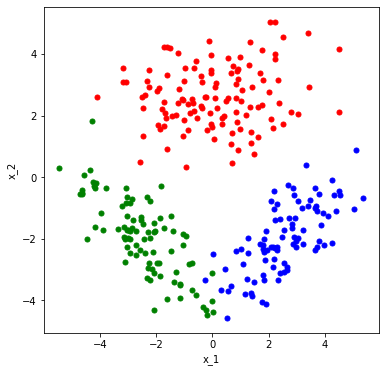

In [9]:
# Plot generated data points
plt.figure(figsize = (6, 6))
plt.plot(points_1[:,0], points_1[:, 1], "r.", markersize = 10)
plt.plot(points_2[:,0], points_2[:, 1], "g.", markersize = 10)
plt.plot(points_3[:,0], points_3[:, 1], "b.", markersize = 10)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

### Compute Classification Parameters

In [10]:
# Compute sample means
sample_means = np.array([[np.sum(points_1[:, 0])/class_sizes[0], np.sum(points_1[:, 1]) / class_sizes[0]],
                         [np.sum(points_2[:, 0])/class_sizes[1], np.sum(points_2[:, 1]) / class_sizes[1]],
                         [np.sum(points_3[:, 0])/class_sizes[2], np.sum(points_3[:, 1]) / class_sizes[2]]])


# Compute sample covariances
sample_covariances = [np.cov(points_1.T), np.cov(points_2.T), np.cov(points_3.T)]

# Compute class prior probabilities
class_priors = np.array([class_sizes[0] / N, class_sizes[1] / N, class_sizes[2] / N])

In [11]:
print("Sample Means:\n\n", sample_means.T)
print("\nClass Priors:\n\n", class_priors)
print("\nSample Covariances:\n", *sample_covariances, sep = "\n")

Sample Means:

 [[ 0.04453807 -2.48491067  2.54954735]
 [ 2.61225128 -1.94817984 -1.9888099 ]]

Class Priors:

 [0.4 0.3 0.3]

Sample Covariances:

[[2.83985866 0.22625045]
 [0.22625045 1.01248436]]
[[ 1.54796955 -1.20213971]
 [-1.20213971  1.59048404]]
[[1.41502266 0.93329244]
 [0.93329244 1.26185153]]


### Declare Score Functions

In [12]:
# Score function for class 1
def score_1(x):
    def calc_loglikelihood(residuals, cov):
        return -0.5 * (np.log(np.linalg.det(cov)) + residuals.T.dot(np.linalg.inv(cov)).dot(residuals)) + np.log(class_priors[0])

    residuals = x - sample_means[0]
    loglikelihood = calc_loglikelihood(residuals, sample_covariances[0])
    return loglikelihood


In [13]:
# Score function for class 2
def score_2(x):
    def calc_loglikelihood(residuals, cov):
        return -0.5 * (np.log(np.linalg.det(cov)) + residuals.T.dot(np.linalg.inv(cov)).dot(residuals)) + np.log(class_priors[1])

    residuals = x - sample_means[1]
    loglikelihood = calc_loglikelihood(residuals, sample_covariances[1])
    return loglikelihood

In [14]:
# Score function for class 3
def score_3(x):
    def calc_loglikelihood(residuals, cov):
        return -0.5 * (np.log(np.linalg.det(cov)) + residuals.T.dot(np.linalg.inv(cov)).dot(residuals)) + np.log(class_priors[2])

    residuals = x - sample_means[2]
    loglikelihood = calc_loglikelihood(residuals, sample_covariances[2])
    return loglikelihood

In [15]:
# Prediction function
def find_label(x):
    score1 = score_1(x)
    score2 = score_2(x)
    score3 = score_3(x)
    score = max(score1, score2, score3)
    if(score == score1):
        return 1
    elif(score == score2):
        return 2
    else:
        return 3

### Compute Predicted Classes and Confusion Matrix

In [16]:
# Generate predicted labels
y_pred = np.empty(N, dtype=int)
for i in range(N):
    y_pred[i] = find_label(points[i])


# Print Confusion Matrix
confusion_matrix = pd.crosstab(y_pred, labels, rownames=['y_pred'], colnames=['y_truth'])
print (confusion_matrix)     

y_truth    1   2   3
y_pred              
1        120   1   0
2          0  89   1
3          0   0  89


### Plot Decision Boundaries

In [21]:
# Prepare contour parameters for plotting
x = np.linspace(-6,6, 501)
y = np.linspace(-6,6, 501)
X,Y = np.meshgrid(x,y)
Z = np.zeros((501, 501))

for i in range(501):
    for j in range(501):
        Z[i][j] = find_label([X[i][j], Y[i][j]])
        
# Wait this cell for a few seconds to be completed

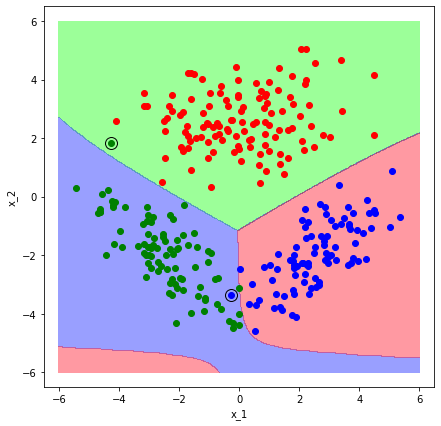

In [22]:
# Plot Decision Boundaries 
cmap = plt.cm.get_cmap("hsv", 4)
        
plt.figure(figsize = (7,7))
plt.plot(points_1[:,0], points_1[:, 1], "r.", markersize = 12)
plt.plot(points_2[:,0], points_2[:, 1], "g.", markersize = 12)
plt.plot(points_3[:,0], points_3[:, 1], "b.", markersize = 12)
plt.plot(points[y_pred != labels,0], points[y_pred != labels,1], "ko", markersize = 12, fillstyle="none")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.ylim(-6.5, 6.5)
plt.xlim(-6.5, 6.5)
plt.contourf(x, y, Z, levels=np.arange(-0.5,4), cmap = cmap, alpha=0.4)
plt.show()